<a href="https://colab.research.google.com/github/namratajangid/University-Couseling-Chatbot/blob/master/University_Counselling_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**

In [0]:
# importing chat-bot intents file
import json
with open('intents.json') as json_data:
    intents = json.load(json_data)

In [0]:
# importing libraries required for NLP
import nltk
nltk.download('punkt')
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

import numpy as np
import random

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import utils
from keras import layers

import matplotlib.pyplot as plt

## **Processing**

In [0]:
words = []
classes = []
documents = []
ignore_words = ['?']
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# stem and lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# remove duplicates
classes = sorted(list(set(classes)))

print (len(documents), "documents", documents)
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)

In [0]:
# create our training data
training = []
output = []
# create an empty array for our output
output_empty = [0] * len(classes)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    #print(classes.index(doc[1]))
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])
    #print(pattern_words)p

In [0]:
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)

# create train and test lists
train_x = list(training[:,0])  #prints the first column of the matrix (patterns)
train_y = list(training[:,1])  #prints the second column of the matrix (tags/context)
print(train_x)
print(train_y) 
print(len(train_x))
print(len(train_y))

In [19]:
model = Sequential()
model.add(Dense(40, input_shape=[len(train_x[0])]))
model.add(Dropout(0.2))
model.add(Dense(40))
#model.add(Dense(40))
model.add(Dense(len(train_y[0]), activation='softmax'))

#model.summary()
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
#history = model.fit(np.array(train_x), np.array(train_y), epochs=500, batch_size=16)
#print(len(model.weights)) 6


#Taken from a pervious version 
#model = Sequential()
#model.add(Dense(40, input_shape=[len(train_x[0],)]))
#model.add(Dropout(0.20))
#model.add(Dense(40))
#model.add(Dense(len(train_y[0]), activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
es = keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, baseline = '0.01', patience=20)
history = model.fit(np.array(train_x), np.array(train_y), epochs=100, batch_size=16, callbacks = es)




Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 40)                13480     
_________________________________________________________________
dropout_2 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_9 (Dense)              (None, 60)                2460      
Total params: 17,580
Trainable params: 17,580
Non-trainable params: 0
_________________________________________________________________


TypeError: ignored

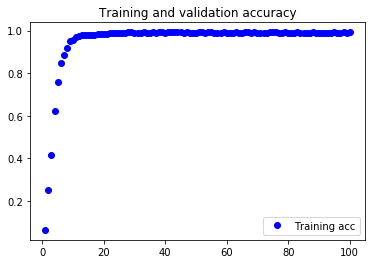

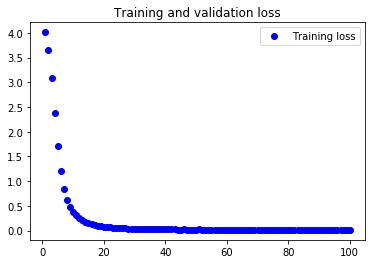

In [20]:
model.save('model_ChatBot.h5')
history_dict = history.history
history_dict.keys()
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc,'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
model = Sequential()
model.add(Dense(40, input_shape=[len(train_x[0],)]))
model.add(Dense(40))
#model.add(Dense(40))
model.add(Dense(len(train_y[0]), activation='softmax'))


model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(np.array(train_x), np.array(train_y), epochs=100, batch_size=16)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 40)                13480     
_________________________________________________________________
dense_14 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_15 (Dense)             (None, 60)                2460      
Total params: 17,580
Trainable params: 17,580
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1016/1016 [==============================] - 1s 534us/step - loss: 3.9983 - acc: 0.0817
Epoch 2/100
1016/1016 [==============================] - 0s 102us/step - loss: 3.6463 - acc: 0.2894
Epoch 3/100
1016/1016 [==============================] - 0s 98us/step - loss: 3.0592 - acc: 0.4272
Epoch 4/100
1016/1016 [==============================] - 0s 101us/step - loss: 2.

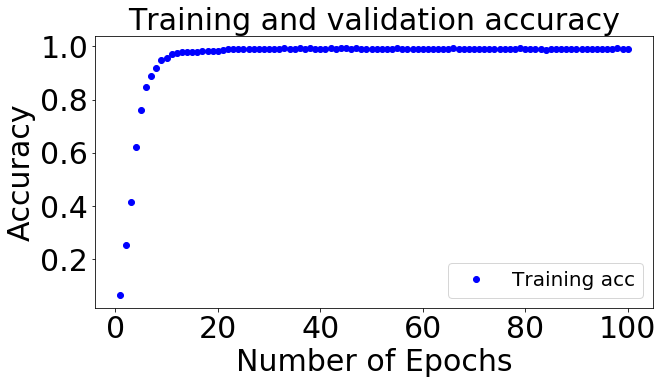

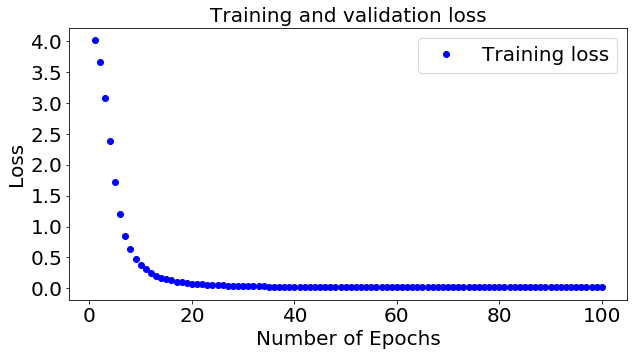

In [9]:
model.save('model_ChatBot.h5')
history_dict = history.history
history_dict.keys()
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(10,5))
plt.plot(epochs, acc,'bo', label='Training acc')
plt.xlabel('Number of Epochs',fontsize=30)
plt.ylabel('Accuracy',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.title('Training and validation accuracy',fontsize=30)
plt.legend(loc="lower right",fontsize=20)
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss',fontsize=20)

plt.legend(fontsize=20)
plt.xlabel('Number of Epochs',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [0]:
def clean_up_sentence(sentence):
    # tokenize the pattern
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=True):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words) 
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag:", w)

    return(np.array(bag))

In [0]:
# create a data structure to hold user context
context = {}

ERROR_THRESHOLD = 0.55
def classify(sentence):
    # generate probabilities from the model
    p = bow(sentence, words)
    d = len(p)
    f = len(documents)-2
    a = np.zeros([f, d])
    tot = np.vstack((p,a))
    
    results = model.predict(tot)[0]
    #print("Model preditions: ", len(results))
    #for i in results:
     # print(i*100)
    
    # filter out predictions below a threshold
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1]))
    # return tuple of intent and probability
    #print("Return list ", len(return_list))
    #print(return_list)
    return return_list

def response(sentence, userID, actual_tag_list, show_details=False):
    results = classify(sentence)
    result = results[0]
    print('Resulting Intent:',result[0])
    print('Probability:',result[1])
    # if we have a classification then find the matching intent tag
    if results:
        # loop as long as there are matches to process
        while results:
            for i in intents['intents']:
                # find a tag matching the first result
                if i['tag'] == results[0][0]:
                    # set context for this intent if necessary
                    if 'context_set' in i:
                        if show_details: print ('context:', i['context_set'])
                        context[userID] = i['context_set']

                    # check if this intent is contextual and applies to this user's conversation
                    if not 'context_filter' in i or \
                        (userID in context and 'context_filter' in i and i['context_filter'] == context[userID]):
                        if show_details: 
                          print ('Intent Tag:', i['tag'])
                          if (i['tag']!=['']):
                            actual_tag_list.append(i['tag'])
                          if (i['tag']==['']):
                            actual_tag_list.append("emptytag")
                        # a random response from the intent
                        print(random.choice(i['responses']))
                        return (random.choice(i['responses']), actual_tag_list)
            results.pop(0)

In [14]:
#Testing
query_list = ["How can I get admission in B.Tech?", "Highest package of btech", "Hey can you tell me about the college campus", "Compare between cs and it", "Why computer and why not it", "Btech integrated admissions", "Tell me about yourself", "btech integrated details", "how much does a course costs", "should i go for engineering in civil", "give me placement results", "can you provide contact information","Programs offered?","Courses offered?","PG programs?","MBA Tech placements?","International Companies on campus?","Hostel Facilities?","Can I get information on fee structure for B.Tech course?","MPSTME campus?","Data Science","Compare B.Tech and MBA Tech","Why should I opt for MCA?","Can you assist me with M.Tech admission process?","Take me to college website","Courses offered at Shirpur Campus?","Library Facilities","List of phd courses","List of M.Tech courses","Programs","Phd","PhD mentor list","Course Structure","Fees for PhD","Discipline for PhD","How to apply?","How to apply for PhD admission?","Whats about placement?","International Firms","Do you have any scholarship?","Stipend in masters program?","Postgraduate program","Seats for PhD","Intake for post graduation","Seats in B.Tech","Intake for B.Tech","Intake for MCA","Entrance procedure for B.Tech","Admission in B.Tech","MBA Tech. Admissions"]

expected_tag_list = ["btechandmbatechadmissions", "placements", "campus", "itVsCS", "itVsCS", "otherprogramsadmissions", "aboutcollege", "CourseB.TechInt", "generalfeestructure", "whyCivil", "placements", "contactDetails", "generalPrograms", "generalCourses", "postgradprograms", "placements", "placements", "hostelInfo", "generalfeestructure", "campus", "streamDataScience", "btechVSmbatech", "whyMCA", "otherprogramsadmissions", "aboutcollege", "generalCourse", "campus", "CoursePhD", "CourseM.Tech", "ambiguousQueries", "ambiguousQueries", "CoursePhD", "courseStructure", "generalfeestructure", "CoursePhD", "otherprogramsadmissions", "otherprogramsadmissions", "placements", "placements", "scholarship", "CoursePhD", "postgradprograms", "CoursePhD", "postgradprograms", "CourseB.Tech", "CourseB.Tech", "CourseMCA", "btechandmbatechadmissions", "btechandmbatechadmissions", "btechandmbatechadmissions"]
actual_tag_list = []
print(len(query_list))
for i in query_list:
  ans = response(i, "123", actual_tag_list, show_details = True)
  #print(ans[0])
  
print(len(query_list))
print(len(expected_tag_list))
print(len(ans[1]))

import matplotlib.pyplot as plt

passed = 32
failed = 18
  

print("Test cases passed: ", passed)
print("Test cases failed: ", failed)
      
PassPercent = (passed*100)/50
print(PassPercent)


50
found in bag: how
found in bag: can
found in bag: i
found in bag: get
found in bag: admission
found in bag: in
found in bag: b.tech
Resulting Intent: btechandmbatechadmissions
Probability: 0.99995327
Intent Tag: btechandmbatechadmissions
Engineering aspirants interested for MBA Tech and BTech programs need to appear for NPAT. Admissions will be granted to various courses based on NPAT scores. You may follow the link for more information on NPAT - https://www.nmims.edu/docs/announcement-new-npat-pattern-for-engineering-programs.pdf
found in bag: highest
found in bag: package
found in bag: of
found in bag: btech
Resulting Intent: placements
Probability: 0.9118756
Intent Tag: placements
At MPSTME, we have a dedicated Placement Cell to help students get good internship and placement opportunities. We help students connect with some of the best companies in market, like EY, Nomura, Mahindra, Infosys, etc. For an overview of placements please visit the following link: https://engineering.

IndexError: ignored

In [15]:
response("how can i reach college?", "123",actual_tag_list, show_details = True)

found in bag: how
found in bag: can
found in bag: i
found in bag: reach
found in bag: college
Resulting Intent: contactDetails
Probability: 0.9984549
Intent Tag: contactDetails
You can reach us at: Bhakti Vedant Swami Marg, Near Cooper Hospital, JVPD Scheme, Vile Parle (West), Mumbai. Maharashtra- 400 056, India. Tel. No: (+91 22 4233 4000) Email: (enquiry.mpstme@nmims.edu) / (admissions.MPSTME@nmims.edu)


('You can reach us at: Bhakti Vedant Swami Marg, Near Cooper Hospital, JVPD Scheme, Vile Parle (West), Mumbai. Maharashtra- 400 056, India. Tel. No: (+91 22 4233 4000) Email: (enquiry.mpstme@nmims.edu) / (admissions.MPSTME@nmims.edu)',
 ['btechandmbatechadmissions', 'placements', 'contactDetails'])

In [16]:
response("who is the dean of the college?", "123",actual_tag_list, show_details = True)

found in bag: is
found in bag: the
found in bag: dean
found in bag: of
found in bag: the
found in bag: college
Resulting Intent: dean
Probability: 0.9988788
Intent Tag: dean
Dr. N. T. Rao


('Dr. N. T. Rao',
 ['btechandmbatechadmissions', 'placements', 'contactDetails', 'dean'])

In [17]:
response("which is better CS or IT", "123",actual_tag_list, show_details = True)

found in bag: which
found in bag: is
found in bag: c
found in bag: it
Resulting Intent: streamComputer
Probability: 0.82703406
Intent Tag: streamComputer
We play a significant role in creating Computer Engineering Graduates with sound technical and managerial skills of value to industry and society both at national and international level.We provide Computer Engineering Stream in the following courses: B. Tech, B. Tech Integrated, MBA Tech, M. Tech


('We play a significant role in creating Computer Engineering Graduates with sound technical and managerial skills of value to industry and society both at national and international level.We provide Computer Engineering Stream in the following courses: B. Tech, B. Tech Integrated, MBA Tech, M. Tech',
 ['btechandmbatechadmissions',
  'placements',
  'contactDetails',
  'dean',
  'streamComputer'])